In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../common')

In [2]:
from commonfunctions import visualize_dendrogram, visualize_cluster_data

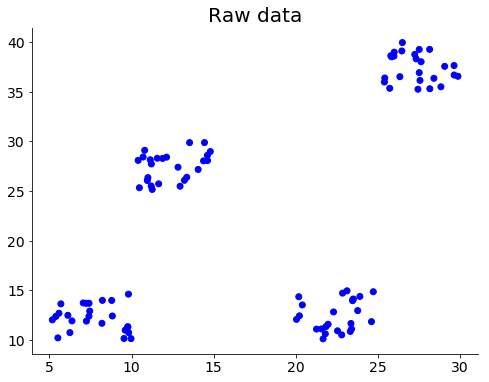

In [3]:
# Read the dataset and visualize the data
dataset = pd.read_csv('../Data/cluster1.csv')
X = dataset.iloc[:, [1,2]].values
clusters = [0] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')

## Start by fitting 4 clusters to first dataset

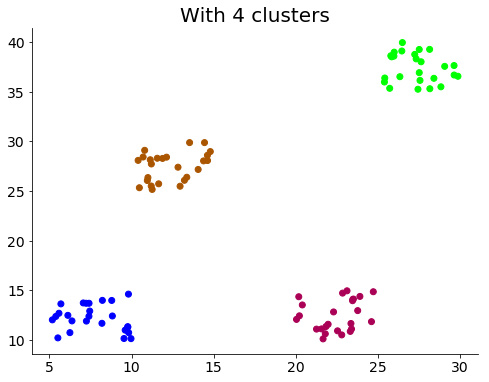

In [4]:
# Perform clustering
from sklearn.cluster import AgglomerativeClustering

estimator = AgglomerativeClustering(n_clusters = 4)
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'With 4 clusters', filename = 'file1clusters4')

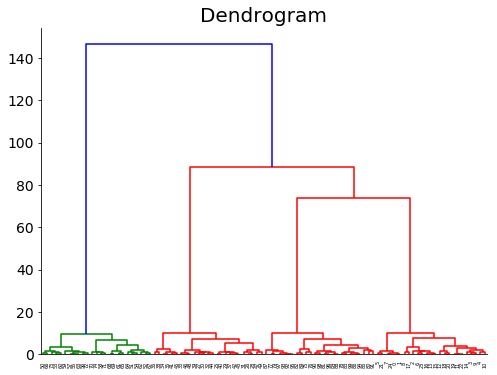

In [5]:
# Visualize the dendrogram for current dataset
visualize_dendrogram(plt, X, filename = 'dendrofile1')

## Try to fit 4 clusters to dataset 2

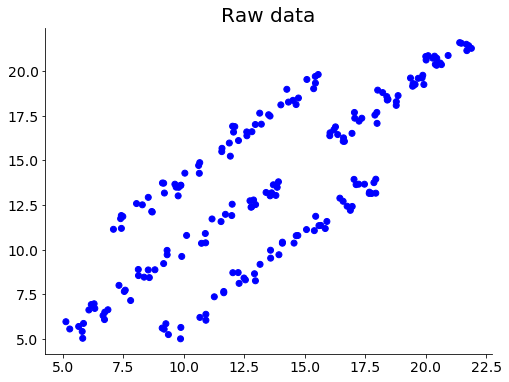

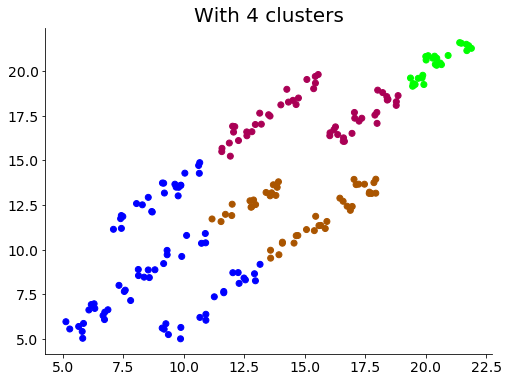

In [6]:
X = pd.read_csv('../Data/cluster3.csv').iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')
estimator = AgglomerativeClustering(n_clusters = 4)
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'With 4 clusters', filename = 'file3clusters4' )

## Use directional similiarity to compute the affinity
We will use linkage = complete and affinity = cosine


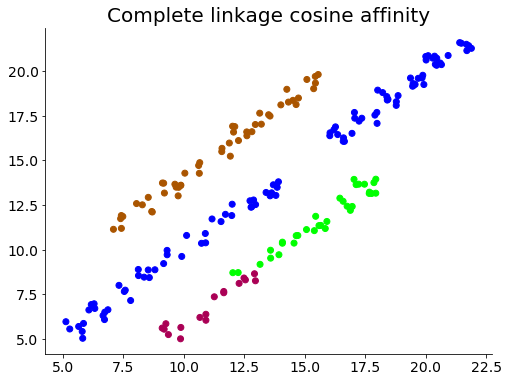

In [7]:
estimator = AgglomerativeClustering(n_clusters = 4, linkage='complete', affinity='cosine')
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'Complete linkage cosine affinity' , filename = 'file3clusters4completecosine')

## Try to fit 2 clusters to dataset 4
First with default values; Second with cosine affinity

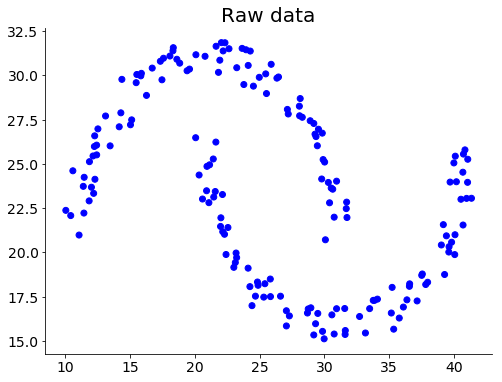

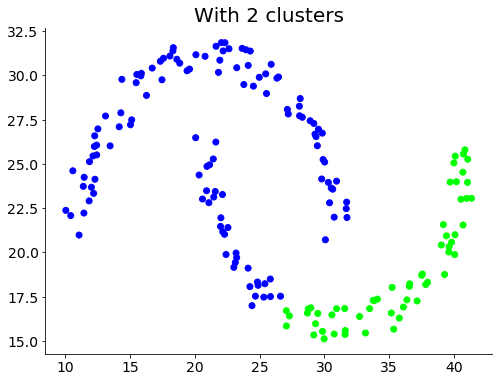

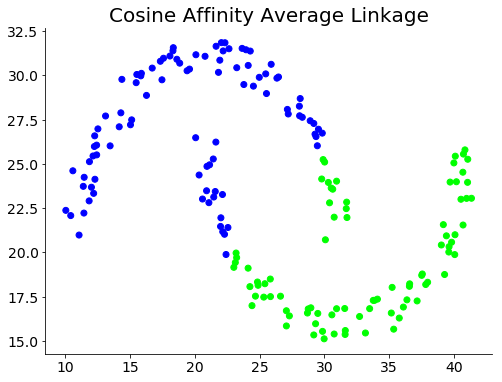

In [8]:
X = pd.read_csv('../Data/cluster4.csv').iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data')

# Default mode
estimator = AgglomerativeClustering(n_clusters = 2)
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'With 2 clusters', filename = 'file4clusters2')

# Cosine affinity and average linkage
estimator = AgglomerativeClustering(n_clusters = 2, linkage='average', affinity='cosine')
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'Cosine Affinity Average Linkage' , filename = 'file4clusters2averagecosine')

## Use of connectivity
Connectivity is a measure of similarity. We will use K Neighbors Graph to compute connectivity

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


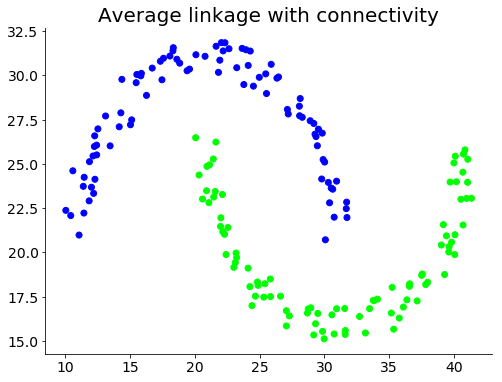

In [9]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
estimator = AgglomerativeClustering(n_clusters = 2, connectivity = connectivity, linkage='average')
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'Average linkage with connectivity', filename = 'file4clusters2connectivity')

## Run for all datasets with2-4 clusters and connectivity 

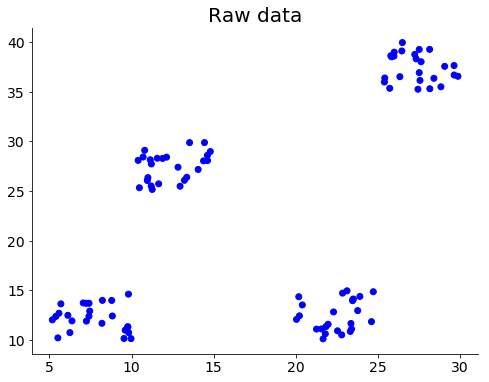

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 4 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


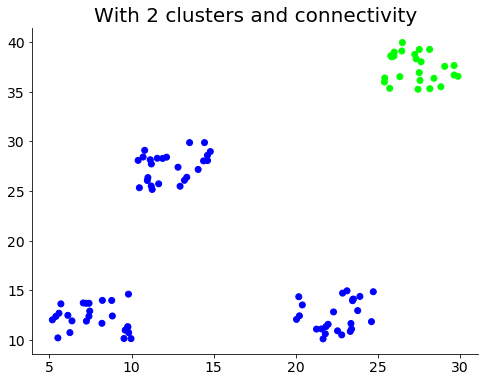

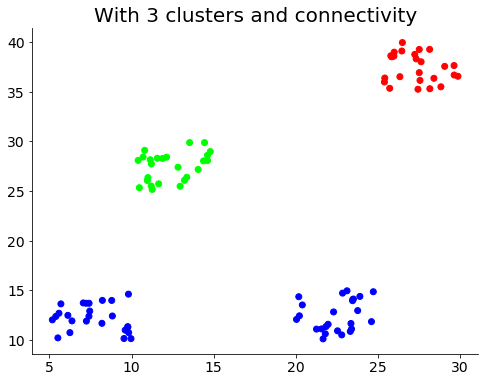

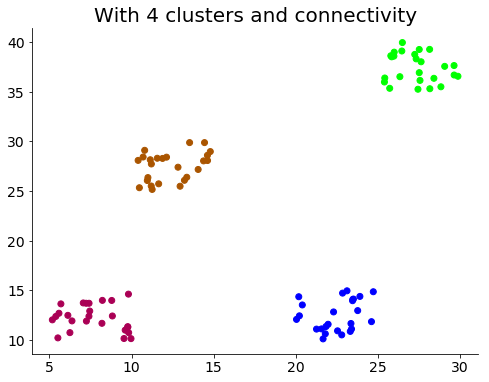

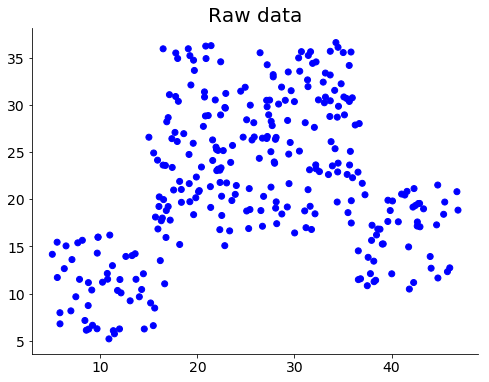

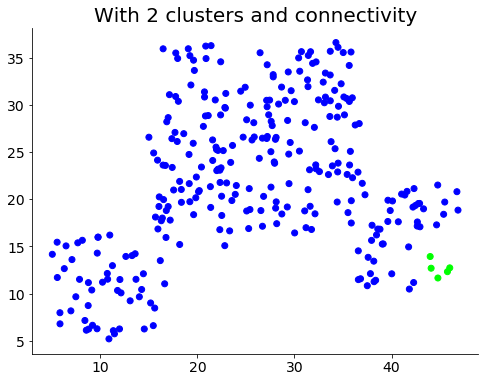

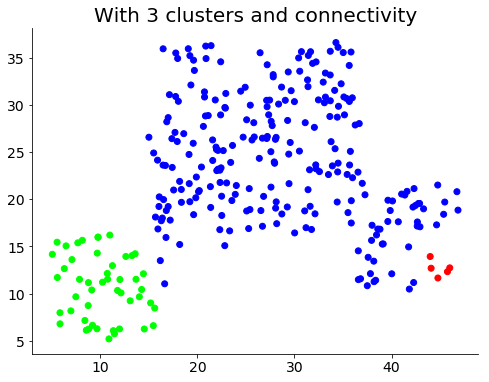

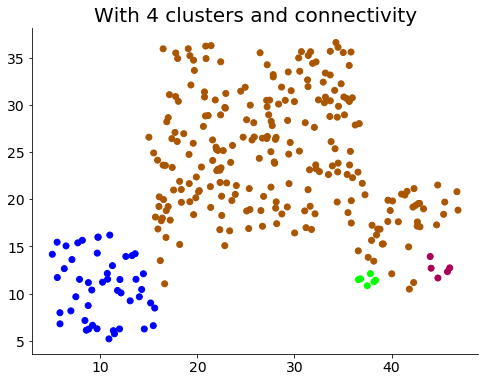

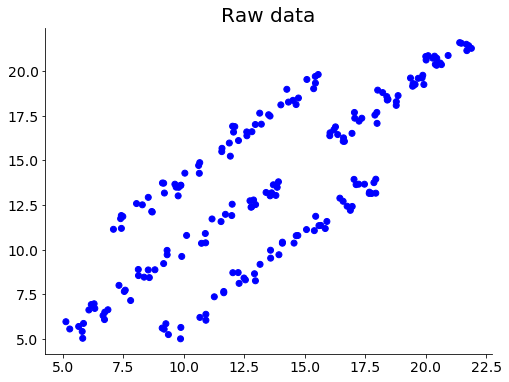

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


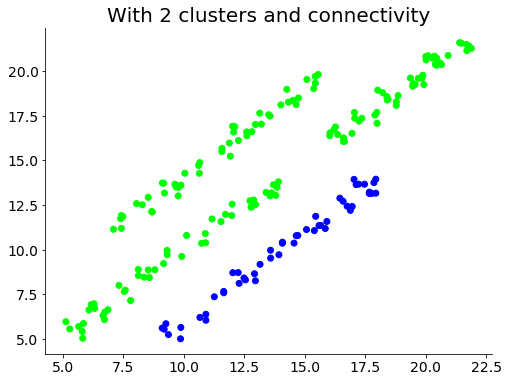

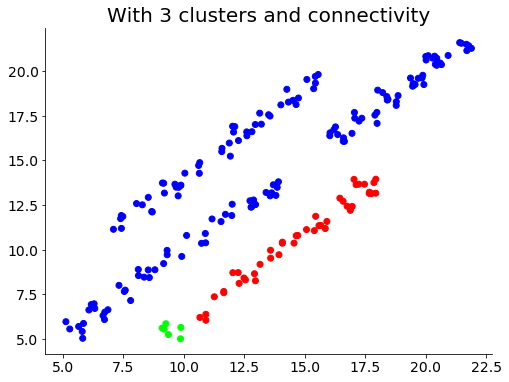

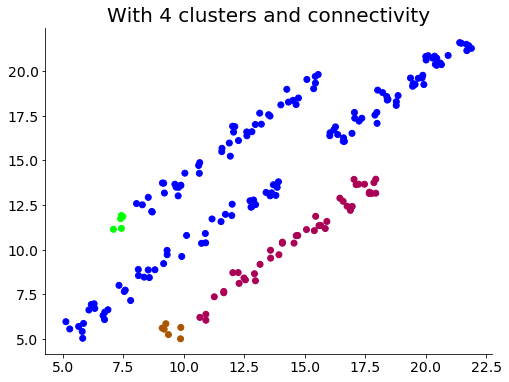

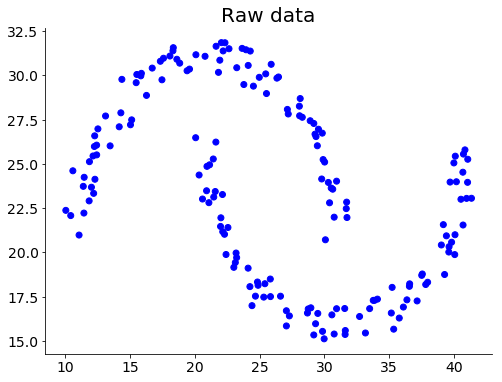

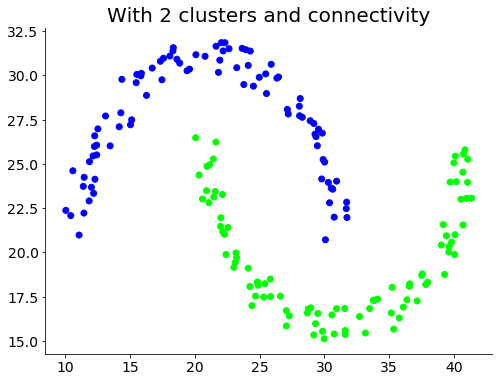

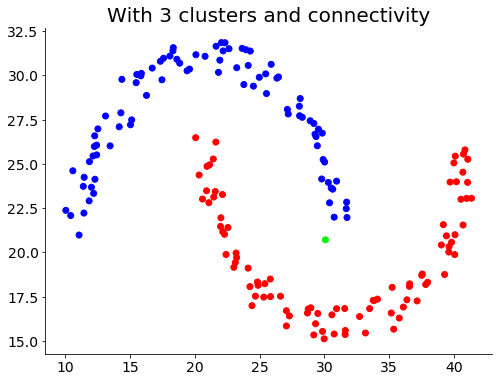

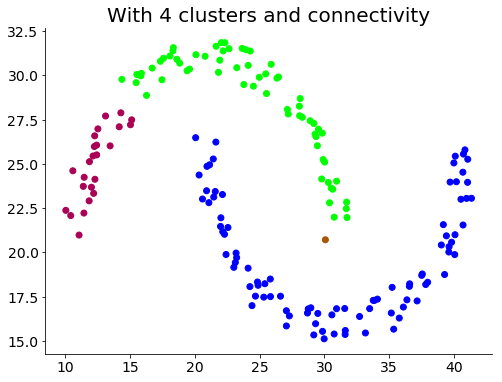

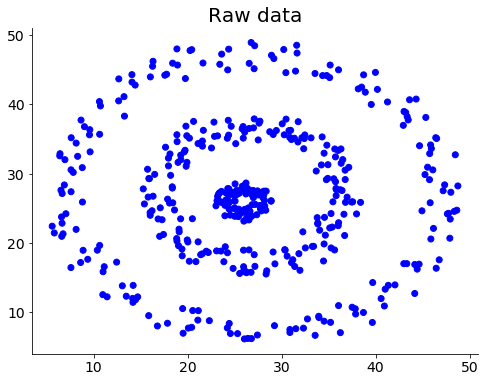

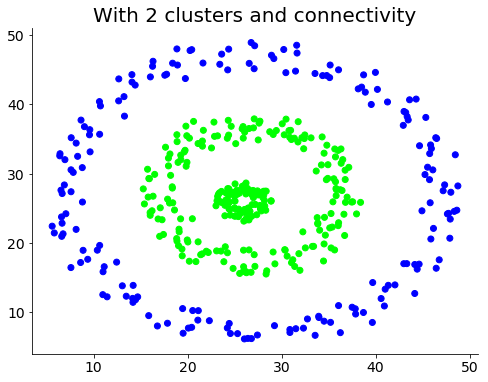

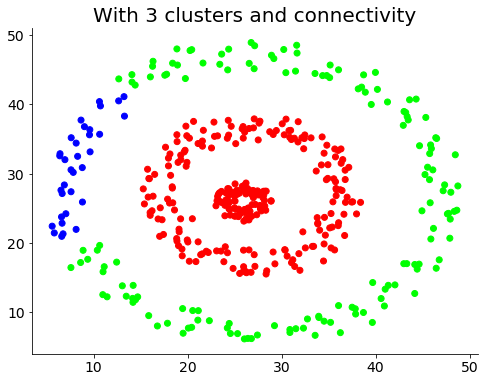

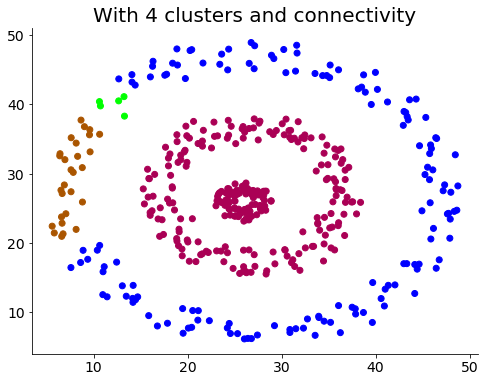

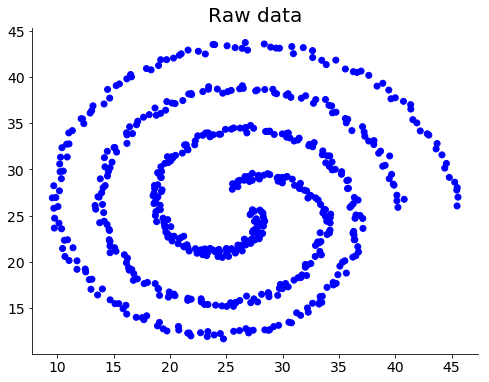

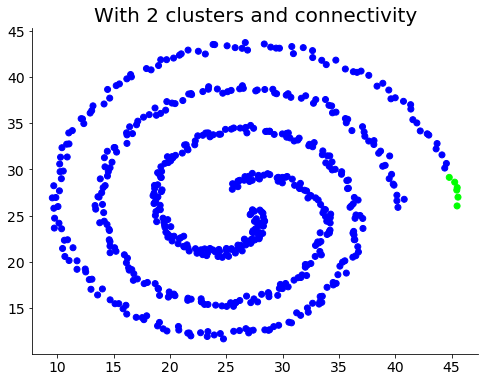

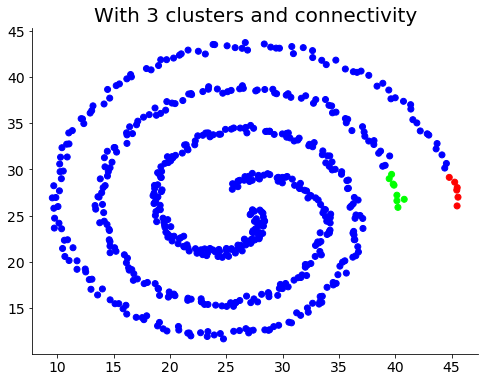

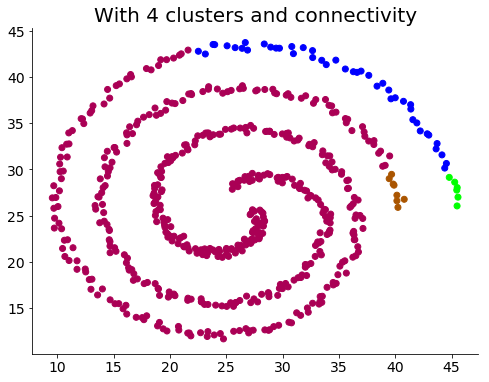

In [10]:
for source in range(1,7):
    X = pd.read_csv('../Data/cluster'+(str)(source)+'.csv').iloc[:, [1,2]].values
    clusters = [2] * X.shape[0]
    visualize_cluster_data(plt, X, clusters, 'Raw data')
       
    knn_graph = kneighbors_graph(X, 10, include_self=False)      
    
    for c in range(2,5):        
        estimator = AgglomerativeClustering(n_clusters = c,  connectivity = knn_graph, linkage='average')
        estimator.fit(X)
        visualize_cluster_data(plt, X, estimator.labels_, 'With '+ (str)(c) +' clusters and connectivity' , filename = 'Loop_file' +(str)(source)+ 'clusters' + (str)(c))